In [112]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [113]:
# Load csv data
df = pd.read_csv('data/clean-surgery-data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Diagnosis,FVC,FEV,PerfStat,Pain,Hae,Dys,Cough,Weak,TNM,T2Diab,MI,PAD,Smoker,Asthma,Age,Target
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60.0,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51.0,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59.0,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54.0,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73.0,1


In [107]:
ml_df = df.drop(columns=['FEV', 'PerfStat', 'Cough', 'MI', 'Asthma', 'Age'])
X = ml_df.drop("Target", axis=1)
y = ml_df["Target"]
X_scaled = StandardScaler().fit_transform(X)
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                        y,
                                                        stratify=y,
                                                        test_size=0.3)
clf = RandomForestClassifier(n_estimators=100,
                             n_jobs=-1,
                             oob_score=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Save a pickle of the model
f = open('prediction_model.pkl', 'wb')
pickle.dump(clf, f)
f.close()

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Score: ", clf.score(X_test, y_test))

Accuracy:  0.8368794326241135
Score:  0.8368794326241135


In [108]:
v = cross_val_score(clf, X_train, y_train, cv=10)
for i in range(10):
    print("Accuracy: {0:2%}".format(v[i,]))
print(" ")
print("Mean accuracy is ", v.mean())



Accuracy: 81.818182%
Accuracy: 81.818182%
Accuracy: 87.878788%
Accuracy: 75.757576%
Accuracy: 81.818182%
Accuracy: 81.818182%
Accuracy: 84.848485%
Accuracy: 78.787879%
Accuracy: 87.878788%
Accuracy: 78.125000%
 
Mean accuracy is  0.8205492424242424


In [109]:
# Confusion Matrix
fit = clf.fit(X_train, y_train)
predict = fit.predict(X_test)
cm = confusion_matrix(y_test, predict)
print(cm)



[[114   6]
 [ 19   2]]


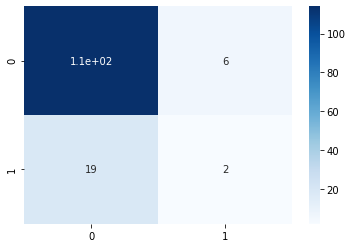

In [110]:
sns.heatmap(cm, annot=True, cmap = 'Blues')
plt.show()



In [111]:
print(classification_report(y_test, predict, zero_division=1))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       120
           1       0.25      0.10      0.14        21

    accuracy                           0.82       141
   macro avg       0.55      0.52      0.52       141
weighted avg       0.77      0.82      0.79       141



In [114]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

# Fit random hyperparameter search for RandomForestClassifier
rs_rf.fit(X_train, y_train)
rs_rf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   38.3s finished


{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}